In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data['variety'] = variety
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data_filtered = data.iloc[:,[0,1,4]]
data_filtered

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_filtered, variety, test_size=0.25)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
lda.predict(X_test)

array([2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2])

In [12]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,2,1
8,2,2
9,0,0


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

In [14]:
lda.means_

array([[5.03428571, 3.5       , 0.        ],
       [5.96216216, 2.74594595, 1.        ],
       [6.605     , 3.0025    , 2.        ]])

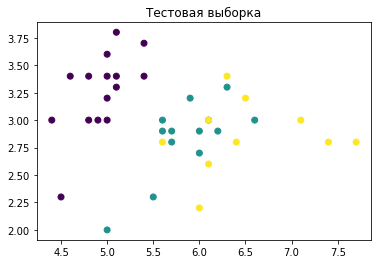

In [15]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.title("Тестовая выборка")
plt.show()

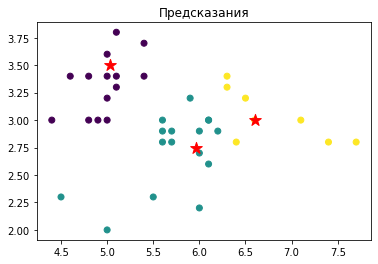

In [16]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title("Предсказания")
plt.show()

In [17]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

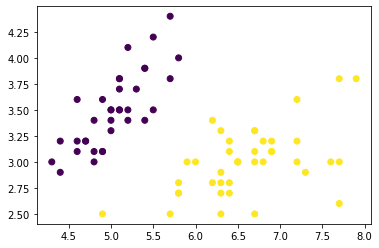

In [18]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [19]:
from sklearn.cluster import KMeans

In [23]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_test)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

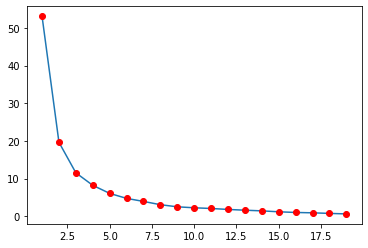

In [24]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [62]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.predict(X_test)
clusters

array([1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1])

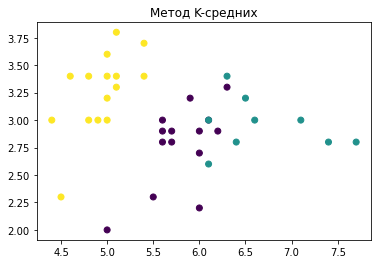

In [63]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=clusters)
plt.title("Метод K-средних")
plt.show()

In [64]:
accuracy_score(y_test, clusters)

0.02631578947368421

In [56]:
result_1 = pd.DataFrame([y_test, clusters]).T
result_1

,0,1
0,2,0
1,0,1
2,0,1
3,1,2
4,1,2
5,1,2
6,1,2
7,2,2
8,2,0
9,0,1
